# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# LOAD DATASET

In [2]:
df = pd.read_csv("marketing_AB.csv")
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [7]:
df.shape

(588101, 7)

In [8]:
df.size

4116707

# split control & test

In [11]:
control = df[df['test group'] == 'control']
test = df[df['test group'] == 'test']

# calculate conversion rates

In [12]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

print("Control Conversion Rate:", control_rate)
print("Test Conversion Rate:", test_rate)

Control Conversion Rate: nan
Test Conversion Rate: nan


# Hypothesis Definition

In [13]:
alpha = 0.05

# Chi-Square Test (for Conversion)

In [15]:
contingency_table = pd.crosstab(df['test group'], df['converted'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("P-value:", p_value)

P-value: 1.9989623063390075e-13


# Interpretation

In [16]:
if p_value <= alpha:
    print("Reject H0: Statistically significant difference")
else:
    print("Fail to reject H0: No significant difference")

Reject H0: Statistically significant difference


# Confidence Interval for Difference in Conversion

In [18]:
n_c = len(control)
n_t = len(test)


# visualization

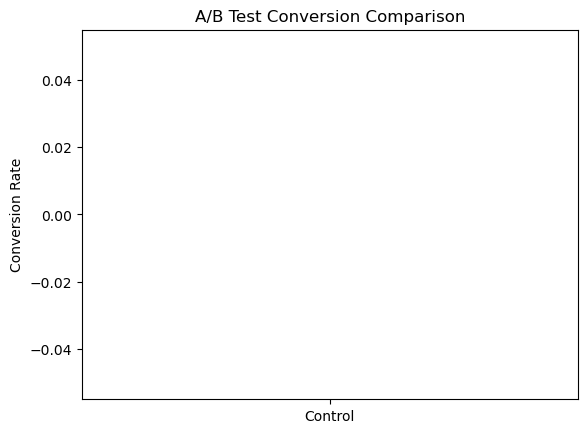

In [21]:
rates = [control_rate, test_rate]
labels = ['Control', 'Test']

plt.bar(labels, rates)
plt.ylabel("Conversion Rate")
plt.title("A/B Test Conversion Comparison")
plt.show()


# final business recommedation

In [22]:
if p_value <= alpha and test_rate > control_rate:
    print("Recommendation: Roll out the Test version.")
else:
    print("Recommendation: Keep the Control version.")

Recommendation: Keep the Control version.
